# Comprehensive Analysis of Yelp Trends and Recommendations

**Group 2**

* Yuanshan Zhang
* Ananya Anand
* Shubham Mishra
* Shizuka Takahshi
* Ruiqi Jiang

## 1. Executive Summary

This Yelp analysis notebook provides a comprehensive evaluation of the situation and trends, with a particular focus on businesses, users, and reviews spanning from 2005 to 2022. The analysis covers various dimensions, including business categories and rating distributions, offering insights into customer satisfaction and business performance. Towards the end of the project, we delved into key findings using Machine Learning techniques in Big Data and presented explanatory visualizations. Based on these findings, it was concluded that classifying businesses and users into various segments can aid Yelp's recommendation system. Additionally, conducting LDA and sentiment analysis on reviews can help businesses improve themselves, leading to the attraction and retention of users.

## 2. Introduction & Motivation

 In today's competitive business landscape, customer feedback plays a crucial role in shaping the success of businesses. However, managing tremendous volumes of data poses challenges in extracting actionable insights to enhance services. By leveraging Big Data techniques, our objective is to provide valuable insights for businesses in several ways. Firstly, we aim to identify businesses that are either liked or disliked by customers by analyzing features such as 'stars' and 'review_count'. Secondly, we aim to discern common compliments and complaints from users by conducting sentiment analysis on reviews. Lastly, we will offer suggestions on how businesses can attract more customers and increase brand exposure.

## 3. Data Description + Data Source

The Yelp dataset consists of 5 JSON files: buiness, checkin, review, tip, and user, covering 150,346 businesses and 6,990,280 reviews. Of particular interest is the business table, which contains over 1.2 million business attributes including hours, parking availability, and ambience. Upon merging with the review table, the resulting table will comprise roughly 6 million rows and require about 8 GB of storage space.

Source: https://www.yelp.com/dataset/documentation/main

Below are the schema for our data:

business.json\
Contains business data including name, address, categories, and so forth.

| Column Name     | Description                                                  | Type                    |
|-----------------|--------------------------------------------------------------|-------------------------|
| business_id     | Unique identifier for the business.                          | string (22 characters)  |
| name            | Name of the business.                                        | string                  |
| address         | Full address of the business.                                | string                  |
| city            | City where the business is located.                          | string                  |
| state           | 2 character state code, if applicable.                       | string                  |
| postal code     | Postal code for the business location.                       | string                  |
| latitude        | Latitude of the business location.                           | float                   |
| longitude       | Longitude of the business location.                          | float                   |
| stars           | Star rating of the business, rounded to half-stars.          | float                   |
| review_count    | Number of reviews for the business.                          | integer                 |
| is_open         | Indicates if the business is open or closed.                 | integer (0 or 1)        |
| attributes      | Business attributes and their values.                        | object                  |
| categories      | Categories the business falls under.                         | array of strings        |
| hours           | Operating hours for each day of the week.                    | object                  |


checkin.json\
Checkins on a business.

| Column Name   | Description                                                                 | Type    |
|---------------|-----------------------------------------------------------------------------|---------|
| business_id   | Unique business identifier, maps to business.json.                          | string  |
| date          | Comma-separated list of timestamps for each check-in (YYYY-MM-DD HH:MM:SS). | string  |


review.json\
Contains full review text data, including the user (user_id) who wrote the review and the business (business_id) for which the review was written.

| Column Name  | Description                                      | Type       |
|--------------|--------------------------------------------------|------------|
| review_id    | Unique review identifier.                        | string     |
| user_id      | Unique user identifier.                          | string     |
| business_id  | Unique business identifier.                      | string     |
| stars        | Star rating given in the review.                 | integer    |
| date         | Date when the review was posted (YYYY-MM-DD).    | string     |
| text         | Content of the review.                           | string     |
| useful       | Number of 'useful' votes received for the review. | integer    |
| funny        | Number of 'funny' votes received for the review. | integer    |
| cool         | Number of 'cool' votes received for the review.  | integer    |


tip.json\
Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.

| Column Name       | Description                                           | Type    |
|-------------------|-------------------------------------------------------|---------|
| text              | Text of the tip.                                      | string  |
| date              | Date when the tip was written (YYYY-MM-DD).           | string  |
| compliment_count  | How many compliments the tip has received.            | integer |
| business_id       | Unique business identifier, maps to business.json.    | string  |
| user_id           | Unique user identifier, maps to the user in user.json.| string  |


user.jason\
User data including the user's friend mapping and all the metadata associated with the user.

| Column Name           | Description                                                                 | Type             |
|-----------------------|-----------------------------------------------------------------------------|------------------|
| user_id               | Unique user identifier, maps to the user in user.json.                      | string           |
| name                  | The user's first name.                                                      | string           |
| review_count          | The number of reviews they've written.                                      | integer          |
| yelping_since         | When the user joined Yelp (YYYY-MM-DD).                                     | string           |
| friends               | An array of the user's friends as user_ids.                                 | array of strings |
| useful                | Number of useful votes sent by the user.                                    | integer          |
| funny                 | Number of funny votes sent by the user.                                     | integer          |
| cool                  | Number of cool votes sent by the user.                                      | integer          |
| fans                  | Number of fans the user has.                                                | integer          |
| elite                 | The years the user was elite.                                               | array of integers|
| average_stars         | Average rating of all reviews.                                              | float            |
| compliment_hot        | Number of hot compliments received by the user.                             | integer          |
| compliment_more       | Number of more compliments received by the user.                            | integer          |
| compliment_profile    | Number of profile compliments received by the user.                         | integer          |
| compliment_cute       | Number of cute compliments received by the user.                            | integer          |
| compliment_list       | Number of list compliments received by the user.                            | integer          |
| compliment_note       | Number of note compliments received by the user.                            | integer          |
| compliment_plain      | Number of plain compliments received by the user.                           | integer          |
| compliment_cool       | Number of cool compliments received by the user.                            | integer          |
| compliment_funny      | Number of funny compliments received by the user.                           | integer          |
| compliment_writer     | Number of writer compliments received by the user.                          | integer          |
| compliment_photos     | Number of photo compliments received by the user.                           | integer          |

## 4. Load Dataset

In [ ]:
path = "gs://843machine/notebooks/jupyter/data/yelp/"

# Read datasets
df_review = spark.read.json(path+'yelp_academic_dataset_review.json')
df_checkin = spark.read.json(path+'yelp_academic_dataset_checkin.json')
df_business = spark.read.json(path+'yelp_academic_dataset_business.json')
df_tip = spark.read.json(path+'yelp_academic_dataset_tip.json')
df_user = spark.read.json(path+'yelp_academic_dataset_user.json')

24/04/29 17:36:08 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [ ]:
from pyspark.sql import functions as F

In [ ]:
# Rename columns
df_business = df_business.withColumnRenamed('stars', 'business_stars')
df_review = df_review.withColumnRenamed('stars', 'review_stars')

df_review = df_review.withColumnRenamed('text', 'review_text')
df_tip = df_tip.withColumnRenamed('text', 'tip_text')

df_review = df_review.withColumnRenamed('date', 'review_date')
df_checkin = df_checkin.withColumnRenamed('date', 'checkin_date')
df_tip = df_tip.withColumnRenamed('date', 'tip_date')

df_business = df_business.withColumnRenamed('review_count', 'business_review_count')
df_user = df_user.withColumnRenamed('review_count', 'user_review_count')

df_business = df_business.withColumnRenamed('name', 'business_name')
df_user = df_user.withColumnRenamed('name', 'user_name')

df_review = df_review.withColumnRenamed('useful', 'review_useful')
df_review = df_review.withColumnRenamed('funny', 'review_funny')
df_review = df_review.withColumnRenamed('cool', 'review_cool')
df_user = df_user.withColumnRenamed('useful', 'user_useful')
df_user = df_user.withColumnRenamed('funny', 'user_funny')
df_user = df_user.withColumnRenamed('cool', 'user_cool')

## 5. Data Cleaning

### 1. Clean df_review

In [ ]:
df_review.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- review_cool: long (nullable = true)
 |-- review_date: string (nullable = true)
 |-- review_funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- review_stars: double (nullable = true)
 |-- review_text: string (nullable = true)
 |-- review_useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [ ]:
# Check null values
for col_name in df_review.columns:
    null_count = df_review.filter(F.col(col_name).isNull()).count()
    if null_count > 0:
        print(f"Column '{col_name}' has {null_count} null values.")
    else:
        print(f"Column '{col_name}' has no null values.")

Column 'business_id' has no null values.


Column 'review_cool' has no null values.


Column 'review_date' has no null values.


Column 'review_funny' has no null values.


Column 'review_id' has no null values.


Column 'review_stars' has no null values.


Column 'review_text' has no null values.


Column 'review_useful' has no null values.


Column 'user_id' has no null values.


In [ ]:
# Check duplicate values
duplicate_rows_review = df_review.exceptAll(df_review.dropDuplicates())
duplicate_rows_review.show()

+-----------+-----------+-----------+------------+---------+------------+-----------+-------------+-------+
|business_id|review_cool|review_date|review_funny|review_id|review_stars|review_text|review_useful|user_id|
+-----------+-----------+-----------+------------+---------+------------+-----------+-------------+-------+
+-----------+-----------+-----------+------------+---------+------------+-----------+-------------+-------+



In [ ]:
# Convert date to timestamp
df_review = df_review.withColumn('review_date', F.to_timestamp('review_date', 'yyyy-MM-dd HH:mm:ss'))

### 2. Clean df_checkin

In [ ]:
df_checkin.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- checkin_date: string (nullable = true)



In [ ]:
# Check null values
for col_name in df_checkin.columns:
    null_count = df_checkin.filter(F.col(col_name).isNull()).count()
    if null_count > 0:
        print(f"Column '{col_name}' has {null_count} null values.")
    else:
        print(f"Column '{col_name}' has no null values.")

Column 'business_id' has no null values.


Column 'checkin_date' has no null values.


In [ ]:
# Check duplicate values
duplicate_rows_checkin = df_checkin.exceptAll(df_checkin.dropDuplicates())
duplicate_rows_checkin.show()

+-----------+------------+
|business_id|checkin_date|
+-----------+------------+
+-----------+------------+



In [ ]:
# Convert date to timestamp
df_checkin = df_checkin.withColumn('checkin_date', F.to_timestamp('checkin_date', 'yyyy-MM-dd HH:mm:ss'))

### 3. Clean df_business

In [ ]:
df_business.printSchema()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [ ]:
# Check null values
for col_name in df_business.columns:
    null_count = df_business.filter(F.col(col_name).isNull()).count()
    if null_count > 0:
        print(f"Column '{col_name}' has {null_count} null values.")
    else:
        print(f"Column '{col_name}' has no null values.")

Column 'address' has no null values.


Column 'attributes' has 13744 null values.


Column 'business_id' has no null values.


Column 'categories' has 103 null values.
Column 'city' has no null values.


Column 'hours' has 23223 null values.


Column 'is_open' has no null values.


Column 'latitude' has no null values.
Column 'longitude' has no null values.
Column 'business_name' has no null values.
Column 'postal_code' has no null values.
Column 'business_review_count' has no null values.
Column 'business_stars' has no null values.
Column 'state' has no null values.


In [ ]:
# Drop null values
df_business = df_business.dropna()

In [ ]:
# Check there is no null value
for col_name in df_business.columns:
    null_count = df_business.filter(F.col(col_name).isNull()).count()
    if null_count > 0:
        print(f"Column '{col_name}' has {null_count} null values.")
    else:
        print(f"Column '{col_name}' has no null values.")

Column 'address' has no null values.


Column 'attributes' has no null values.


Column 'business_id' has no null values.


Column 'categories' has no null values.


Column 'city' has no null values.


Column 'hours' has no null values.


Column 'is_open' has no null values.


Column 'latitude' has no null values.


Column 'longitude' has no null values.


Column 'business_name' has no null values.


Column 'postal_code' has no null values.


Column 'business_review_count' has no null values.


Column 'business_stars' has no null values.
Column 'state' has no null values.


In [ ]:
# Check duplicate values
duplicate_rows_business = df_business.exceptAll(df_business.dropDuplicates())
duplicate_rows_business.show()

+-------+----------+-----------+----------+----+-----+-------+--------+---------+-------------+-----------+---------------------+--------------+-----+
|address|attributes|business_id|categories|city|hours|is_open|latitude|longitude|business_name|postal_code|business_review_count|business_stars|state|
+-------+----------+-----------+----------+----+-----+-------+--------+---------+-------------+-----------+---------------------+--------------+-----+
+-------+----------+-----------+----------+----+-----+-------+--------+---------+-------------+-----------+---------------------+--------------+-----+



### 4. Clean df_tip

In [ ]:
df_tip.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- compliment_count: long (nullable = true)
 |-- tip_date: string (nullable = true)
 |-- tip_text: string (nullable = true)
 |-- user_id: string (nullable = true)



In [ ]:
# Check null values
for col_name in df_tip.columns:
    null_count = df_tip.filter(F.col(col_name).isNull()).count()
    if null_count > 0:
        print(f"Column '{col_name}' has {null_count} null values.")
    else:
        print(f"Column '{col_name}' has no null values.")

Column 'business_id' has no null values.


Column 'compliment_count' has no null values.


Column 'tip_date' has no null values.


Column 'tip_text' has no null values.


Column 'user_id' has no null values.


In [ ]:
# Check duplicate values
duplicate_rows_tip = df_tip.exceptAll(df_tip.dropDuplicates())
duplicate_rows_tip.show()

+--------------------+----------------+-------------------+--------------------+--------------------+
|         business_id|compliment_count|           tip_date|            tip_text|             user_id|
+--------------------+----------------+-------------------+--------------------+--------------------+
|5RsVAkDnMrcSbErS6...|               0|2017-10-20 22:08:25|Pricey, often cro...|hGxVvXVg7IK4J2aTi...|
|diovHdArxKlT5ZgkT...|               0|2017-04-01 23:52:40|Love it. Very spe...|6ZwGm0WBtMgo5pCwy...|
|qS6aoTPVBLl4yN3AB...|               0|2010-09-25 12:47:58|Good caffe americ...|6bVqgocLbgPxTFEpG...|
|fiBEzPfn2VOZb-PjL...|               0|2011-01-02 01:54:07|Thanks to Jason f...|hFXm631ou0FeHn7k4...|
|Hpud8V6Bt0PHMqlpx...|               0|2016-11-17 15:50:07|   rude rude rude!!!|8KyX_XGnF0uRxTCqx...|
|GV-e7Op4aU98xkjjo...|               0|2011-07-07 23:47:31|           My faves!|WtgVYb9PgxaOzaXo4...|
|dmstmwJ6OE5Wkysgx...|               0|2015-04-19 20:32:41|         Her hogwash|TL

In [ ]:
# Drop duplicate values
df_tip = df_tip.drop_duplicates()

In [ ]:
# Convert date to timestamp
df_tip = df_tip.withColumn('tip_date', F.to_timestamp('tip_date', 'yyyy-MM-dd HH:mm:ss'))

### 5. Clean df_user

In [ ]:
df_user.printSchema()

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- user_cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- user_funny: long (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_review_count: long (nullable = true)
 |-- user_useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)



In [ ]:
# Check null values
for col_name in df_user.columns:
    null_count = df_user.filter(F.col(col_name).isNull()).count()
    if null_count > 0:
        print(f"Column '{col_name}' has {null_count} null values.")
    else:
        print(f"Column '{col_name}' has no null values.")

Column 'average_stars' has no null values.


Column 'compliment_cool' has no null values.


Column 'compliment_cute' has no null values.


Column 'compliment_funny' has no null values.


Column 'compliment_hot' has no null values.


Column 'compliment_list' has no null values.


Column 'compliment_more' has no null values.


Column 'compliment_note' has no null values.


Column 'compliment_photos' has no null values.


Column 'compliment_plain' has no null values.


Column 'compliment_profile' has no null values.


Column 'compliment_writer' has no null values.


Column 'user_cool' has no null values.


Column 'elite' has no null values.


Column 'fans' has no null values.


Column 'friends' has no null values.


Column 'user_funny' has no null values.


Column 'user_name' has no null values.


Column 'user_review_count' has no null values.


Column 'user_useful' has no null values.


Column 'user_id' has no null values.


Column 'yelping_since' has no null values.


In [ ]:
# Check duplicate values
duplicate_rows_user = df_user.exceptAll(df_user.dropDuplicates())
duplicate_rows_user.show()

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+---------+-----+----+-------+----------+---------+-----------------+-----------+-------+-------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer|user_cool|elite|fans|friends|user_funny|user_name|user_review_count|user_useful|user_id|yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+---------+-----+----+-------+----------+---------+-----------------+-----------+-------+-------------+
+-------------+---------------+---------------+----------------+--------------+---------------

In [ ]:
# Convert date to timestamp
df_user = df_user.withColumn('yelping_since', F.to_timestamp('yelping_since', 'yyyy-MM-dd HH:mm:ss'))

## 6. Questions & Exploratory Data Analysis

In [ ]:
!pip install folium

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
plt.style.use('ggplot')

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg
from pyspark.sql.functions import sum as _sum

### 1. How were businesses distributed?

In [ ]:
# Join the DataFrames on 'business_id'
df_joined = df_business.join(df_review, df_business.business_id == df_review.business_id)

# Since we will be doing aggregation, we'll drop duplicates from df_business
df_joined = df_joined.dropDuplicates(['business_id'])

In [ ]:
df_joined.columns

['address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'is_open',
 'latitude',
 'longitude',
 'business_name',
 'postal_code',
 'business_review_count',
 'business_stars',
 'state',
 'business_id',
 'review_cool',
 'review_date',
 'review_funny',
 'review_id',
 'review_stars',
 'review_text',
 'review_useful',
 'user_id']

In [ ]:
# Initialize Spark session
#spark = SparkSession.builder.appName('YelpBusinessMap').getOrCreate()

# Assuming df_joined is a Spark DataFrame created from joining df_business and df_review on 'business_id'
# and filtering for open businesses, limiting to the first 100 rows, and dropping any rows with missing values
business_details = df_joined.filter(df_joined['is_open'] == 1).select(
    'latitude', 'longitude', 'business_name', 'business_stars', 'review_funny', 'review_useful', 'review_cool'
).na.drop().limit(500)

# Convert Spark DataFrame to Pandas DataFrame for visualization with Folium
business_details_pd = business_details.toPandas()

# Create a Folium map centered around the first business location
map_center = [business_details_pd.iloc[0]['latitude'], business_details_pd.iloc[0]['longitude']]
map = folium.Map(location=map_center, zoom_start=2)

# Initialize a MarkerCluster to cluster close markers together
marker_cluster = MarkerCluster().add_to(map)

# Loop over the DataFrame rows and add each business as a marker on the map
for idx, row in business_details_pd.iterrows():
    # Format the pop-up message for the marker
    popup_message = folium.Popup(
        f"<strong>{row['business_name']}</strong><br>"
        f"Rating: {row['business_stars']} stars<br>"
        f"Funny Votes: {row['review_funny']}<br>"
        f"Useful Votes: {row['review_useful']}<br>"
        f"Cool Votes: {row['review_cool']}",
        max_width=300
    )

    # Create the marker with the formatted pop-up and add it to the marker cluster
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_message,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Display the map in a Jupyter notebook (remove .save if not needed)
map

To avoid long runtimes, we limited the extraction to the first 500 rows of the table resulting from the join operation between the business and review tables. We also have a 1000-point version that doesn't appear in the notebook, so we downloaded it and will submit it along with the notebook.

Subsequently, we displayed these businesses, along with their corresponding review information, on the map. You can click on any business point to view this information.

We sought to examine the geographic dispersion of Yelp-registered businesses and observed that the majority of locations on our map are concentrated within the United States. This aligns with Yelp's predominant usage within the U.S., despite its ongoing expansion into other nations.

### 2. How were business ratings distributed across different locations?

In [ ]:
# Assuming 'business_stars' is normalized between 0 and 1 for heatmap intensity
heat_data = [[row['latitude'], row['longitude'], row['business_stars']] for index, row in business_details_pd.iterrows()]
HeatMap(heat_data).add_to(map)

map

After examining the distribution of businesses, we naturally came up with the idea of exploring how their ratings were distributed across different locations. In every location, there are businesses with ratings as high as 4.5 or even 5. However, the U.S. East Coast boasts the highest concentration of top-rated businesses, depicted in orange on the heatmap. Considering the relatively prosperous economic conditions in the East, it's unsurprising that commercial development is more advanced, resulting in higher customer satisfaction.

The 1000-point version of this map will also be attached when submitting the notebook.

### 3. How satisfied were customers with the businesses they have visited?

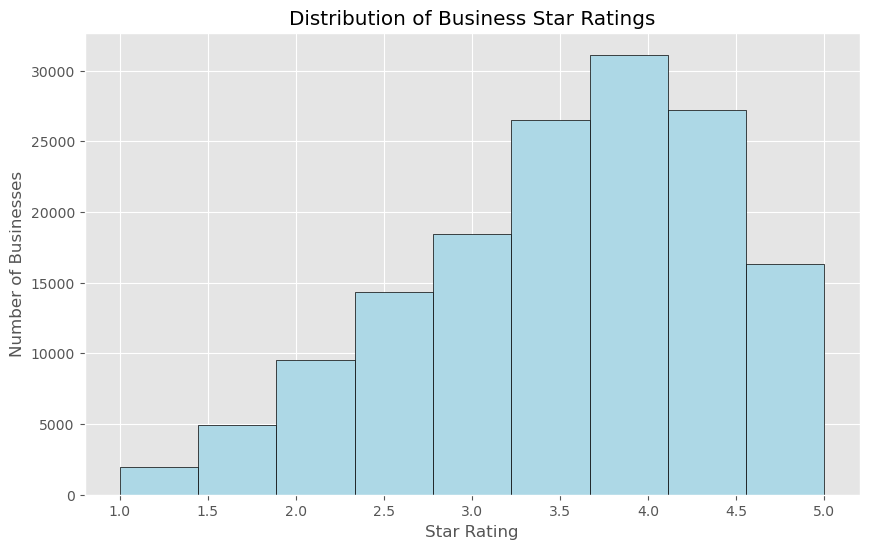

In [ ]:
# Convert the stars column to Pandas for visualization
stars_pd = df_business.select('business_stars').toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(stars_pd, bins=9, color='lightblue', edgecolor='black')
plt.title('Distribution of Business Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Businesses')
plt.show()

This time, we aimed to examine the overall satisfaction level of customers with the businesses they visited, so we visualized the ratings they provided in the form of a histogram. The x-axis shows the star rating on a scale from 1 to 5, and the y-axis represents the number of businesses with that rating. The histogram shows a left-skewed distribution, indicating that most businesses tend to have higher star ratings. The tallest bars are located at the 4.0 and 4.5-star ratings, suggesting that the majority of businesses in this dataset are well-regarded by reviewers. There are notably fewer businesses with low star ratings (1.0 to 2.5), and a modest amount with a perfect 5.0 rating. This pattern could imply a general customer satisfaction with the services provided by these businesses.

### 4. What were the most popular business categories?

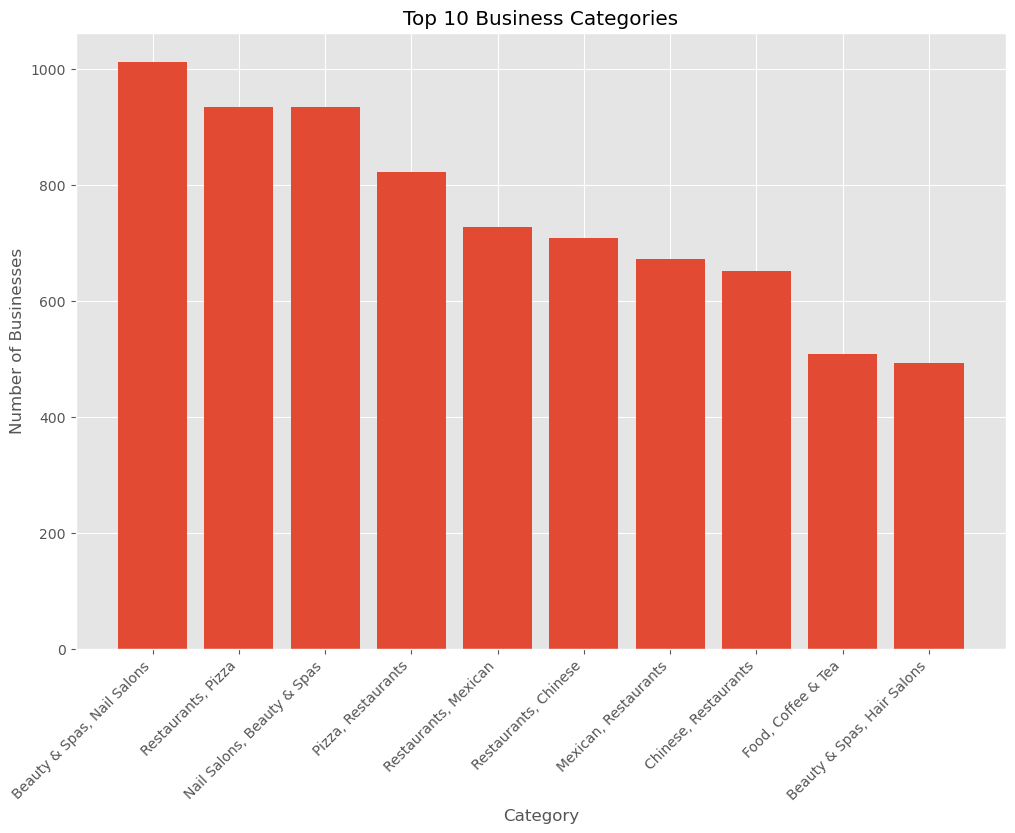

In [ ]:
# Count the occurrences of each category
df_category_counts = df_business.groupBy('categories').count()

# Convert the results to Pandas DataFrame for visualization
df_category_counts_pd = df_category_counts.toPandas()

# Plot the distribution of businesses across categories
plt.figure(figsize=(12, 8))
df_category_counts_pd = df_category_counts_pd.sort_values('count', ascending=False)
plt.bar(df_category_counts_pd['categories'][:10], df_category_counts_pd['count'][:10])  # top 10 categories for simplicity
plt.xticks(rotation=45, ha="right")
plt.xlabel('Category')
plt.ylabel('Number of Businesses')
plt.title('Top 10 Business Categories')
plt.show()

Intrigued by the variance in ratings, we decided to delve into the types of businesses that would draw the most customer attention. A bar chart displaying the count of businesses per category revealed a heavy concentration in beauty & spas and restaurants. In contemporary society, there's a growing emphasis on personal appearance and well-being. Consequently, the beauty service sector has garnered heightened attention and support, with individuals frequently seeking such services. This surge in demand has fueled the growth of related businesses, leading to its top position in terms of business numbers. People's love for food has remained constant throughout time. Therefore, it's not surprising to observe a high number of various restaurants. However, among all categories, pizza appears to be the most popular.

### 5. What businesses had the most useful reviews?

In [ ]:
# Join df_review to df_business
df_joined = df_business.join(df_review, df_business.business_id == df_review.business_id)

# Drop duplicates
df_joined = df_joined.dropDuplicates(['business_id'])

<Figure size 1000x800 with 0 Axes>

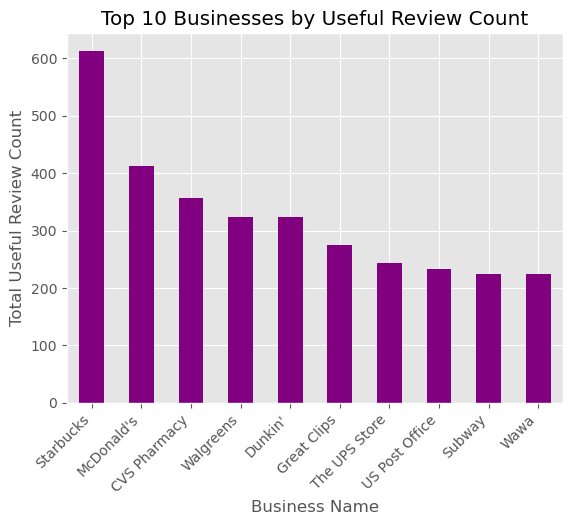

In [ ]:
# Calculate useful reviews for each business
df_useful_count = df_joined.groupBy('business_name').agg(_sum('review_useful').alias('total_useful_count'))

# Extract top 10 from the previous calculations
df_top_useful = df_useful_count.orderBy('total_useful_count', ascending=False).limit(10)

# Convert the results to Pandas DataFrame for visualization
df_top_useful_pd = df_top_useful.toPandas()

# Plotting
plt.figure(figsize=(10, 8))
df_top_useful_pd.plot(kind='bar', x='business_name', y='total_useful_count', legend=None, color='purple')
plt.title('Top 10 Businesses by Useful Review Count')
plt.xlabel('Business Name')
plt.ylabel('Total Useful Review Count')
plt.xticks(rotation=45, ha="right")
plt.show();

We have reviewed the categories of businesses, and now it's time to delve deeper into the status of individual business brands. This graph shows the number of useful reviews for the top ten businesses, with each bar representing a different business. The y-axis indicates the count of useful reviews, while the x-axis lists the business names. The business with the highest count of useful reviews appears to be Starbucks. We've also noticed that the top 10 consist entirely of renowned brands, such as McDonald's, CVS Pharmacy, and Dunkin'.Considering the large customer base of these brands, it's not surprising that they have more useful reviews.

## Summary for the EDA phase
We aimed to explore the geographical distribution of businesses registered on Yelp and found that most spots on our map are located in the U.S. This corresponds to Yelp's primary usage in the States, although it is expanding to other countries. According to the heatmap, we've noticed that the U.S. East Coast stands out for its highest concentration of top-rated businesses, a correlation closely linked to the region's refined business models. Overall, customers were satisfied with their experiences at the businesses they visited, leaving positive records on Yelp—the distribution of star ratings is positively skewed and centralized between 3.5 and 4.5. Beauty & spas and restaurants are the categories with the most businesses. Although the top 10 businesses that provided the most useful reviews are not all from these two categories, most of them are renowned brands, such as Starbucks, McDonald's, and Dunkin'.

Through EDA, we had a glimpse of our data, knowing some basic characteristics of it. In the next stage, we employed machine learning techniques to conduct a more in-depth analysis of the intricate patterns in the data, aiming to generate actionable insights for business improvement.

## Performing Clustering on the BUSINESS dataset

In [ ]:
from pyspark.sql.functions import when
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import ClusteringEvaluator
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import numpy as np

In [ ]:
# Obtain the names of columns under the attributes
struct_column_names = df_business.select("attributes.*").columns

In [ ]:
# Remove useless strings and turn values into 1 and 0
for name in struct_column_names:
    df_business = df_business.withColumn(name, F.col("attributes").getField(name))
    df_business = df_business.withColumn(name, F.regexp_replace(F.col(name), "^u'", "'"))
    df_business = df_business.withColumn(name, F.regexp_replace(F.col(name), "^'|'$", ""))
    df_business = df_business.withColumn(name, F.when(F.col(name).isNull() | (F.col(name) == False) | (F.col(name) == None) | (F.col(name) == 'none') | (F.col(name) == 'no') | (F.col(name) == 'None'), 0)
                                   .when(F.col(name) == True, 1)
                                   .otherwise(F.col(name)))

In [ ]:
# Drop the 'attributes' column
df_business = df_business.drop('attributes')

In [ ]:
# Transform several columns into 1 and 0
df_business = df_business.withColumn('Alcohol', when(df_business['Alcohol'] == 'full_bar', 1).otherwise(when(df_business['Alcohol'] == 'beer_and_wine', 1).otherwise(0)))
df_business = df_business.withColumn('RestaurantsAttire', when(df_business['RestaurantsAttire'] == 'formal', 1).otherwise(when(df_business['RestaurantsAttire'] == 'dressy', 1).otherwise(0)))
df_business = df_business.withColumn('WiFi', when(df_business['WiFi']=='free', 1).otherwise(when(df_business['WiFi']=='paid',1).otherwise(0)))

In [ ]:
# Selecting multiple columns to create a new DataFrame
categorical_columns = df_business.select(
    'AcceptsInsurance',
    'BikeParking',
    'BYOBCorkage',
    'BYOB',
    'Alcohol',
    'BusinessAcceptsBitcoin',
    'BusinessAcceptsCreditCards',
    'ByAppointmentOnly',
    'Caters',
    'CoatCheck',
    'Corkage',
    'DogsAllowed',
    'DriveThru',
    'GoodForDancing',
    'GoodForKids',
    'HappyHour',
    'HasTV',
    'Open24Hours',
    'OutdoorSeating',
    'RestaurantsAttire',
    'RestaurantsCounterService',
    'RestaurantsDelivery',
    'RestaurantsGoodForGroups',
    'RestaurantsReservations',
    'RestaurantsTableService',
    'RestaurantsTakeOut',
    'WheelchairAccessible',
    'WiFi'
)

#### Creating Elbow Plot for BUSINESS Dataset

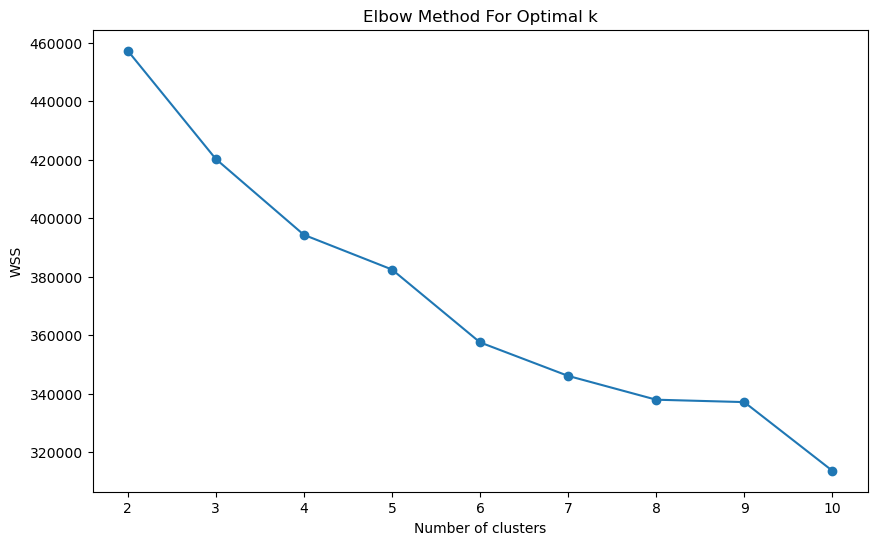

In [ ]:
# Start a Spark Session
spark = SparkSession.builder.appName('Elbow Method').getOrCreate()

indexers = [StringIndexer(inputCol=c, outputCol=c+"_index").setHandleInvalid("keep") for c in categorical_columns.columns]
encoders = [OneHotEncoder(inputCol=idx.getOutputCol(), outputCol=c+"_vec") for idx, c in zip(indexers, categorical_columns.columns)]

# Assembler to combine all feature columns
assembler_inputs = [c+"_vec" for c in categorical_columns.columns]
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

# Pipeline to process and assemble features
pipeline = Pipeline(stages=indexers + encoders + [assembler])
model = pipeline.fit(df_business)
df_transformed = model.transform(df_business)

wss = []

for k in range(2, 11):
    kmeans = KMeans(featuresCol='features', k=k, seed=1)
    model = kmeans.fit(df_transformed.select('features'))
    predictions = model.transform(df_transformed)
    evaluator = ClusteringEvaluator()

    wss.append(model.summary.trainingCost)  # WSS for the model

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

The elbow curve is relatively smooth, making it difficult for us to identify a point where the graph displays a sharp decrease, so we're still unable to determine the most suitable number of clusters. Next, we plotted a silhouette plot to aid in our decision.

#### Creating Silhouette Plot for BUSINESS Dataset

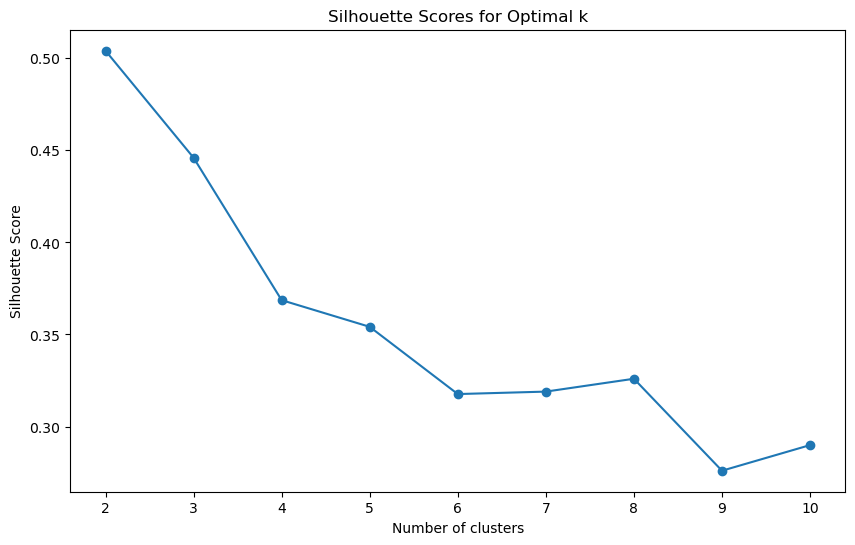

In [ ]:
# Start a Spark Session
spark = SparkSession.builder.appName('Silhouette Method').getOrCreate()

# Assuming 'df_business' is your DataFrame
# and 'categorical_columns' is the list of categorical column names

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").setHandleInvalid("keep") for column in categorical_columns.columns]
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=column+"_vec") for indexer, column in zip(indexers, categorical_columns.columns)]

# Assemble the input columns into a single vector column
assembler_inputs = [encoder.getOutputCol() for encoder in encoders]
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

# Define the pipeline to process the features
pipeline = Pipeline(stages=indexers + encoders + [assembler])
pipelineModel = pipeline.fit(df_business)
df_transformed = pipelineModel.transform(df_business)

# List to store the silhouette scores
silhouette_scores = []

# Test cluster sizes from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(featuresCol='features', k=k, seed=1)
    kmeansModel = kmeans.fit(df_transformed)
    predictions = kmeansModel.transform(df_transformed)

    # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

The silhouette score is highest for two clusters. However, upon considering the elbow plot, two clusters may not be the optimal choice. The silhouette score for three clusters is only slightly lower than that for two, and in the elbow plot, the reduction in inertia from two clusters to three clusters is around 40000, the most significant decrease among adjacent cluster numbers. Therefore, three clusters may be a more appropriate choice.

In [ ]:
# Turn df_business to a pandas DataFrame
df_business1 = df_business.toPandas()

In [ ]:
# Choose the features we need
convenience_features = df_business1[['AcceptsInsurance',
                            'BikeParking',
                            'BYOBCorkage',
                            'BYOB',
                            'Alcohol',
                            'BusinessAcceptsBitcoin',
                            'BusinessAcceptsCreditCards',
                            'ByAppointmentOnly',
                            'Caters',
                            'CoatCheck',
                            'Corkage',
                            'DogsAllowed',
                            'DriveThru',
                            'GoodForDancing',
                            'GoodForKids',
                            'HappyHour',
                            'HasTV',
                            'Open24Hours',
                            'OutdoorSeating',
                            'RestaurantsAttire',
                            'RestaurantsCounterService',
                            'RestaurantsDelivery',
                            'RestaurantsGoodForGroups',
                            'RestaurantsReservations',
                            'RestaurantsTableService',
                            'RestaurantsTakeOut',
                            'WheelchairAccessible',
                            'WiFi']]
# Assuming `convenience_features` has categorical data that needs to be converted.
convenience_features = pd.get_dummies(convenience_features)

/opt/conda/miniconda3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


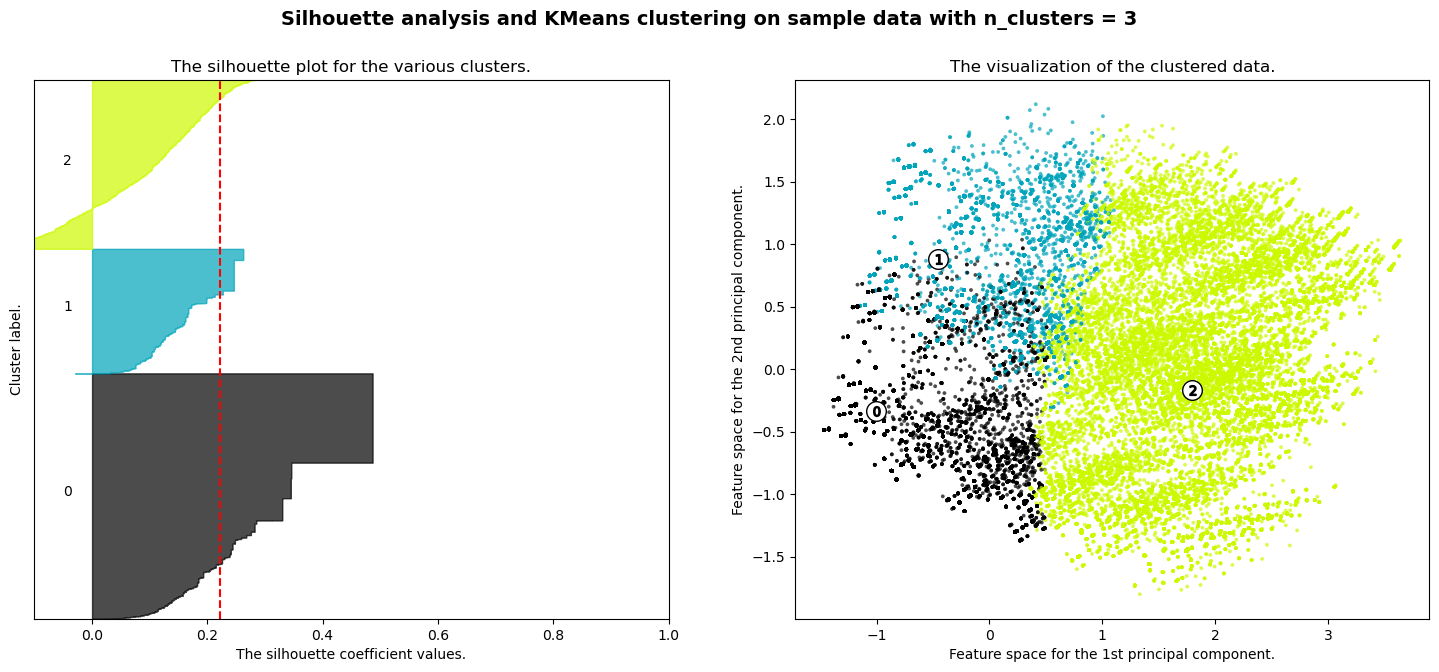

In [ ]:
n_clusters = 3

# Run KMeans clustering on the preprocessed data
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = kmeans.fit_predict(convenience_features)

# Calculate silhouette score
silhouette_avg = silhouette_score(convenience_features, cluster_labels)
sample_silhouette_values = silhouette_samples(convenience_features, cluster_labels)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Silhouette analysis plot (left side)
# The silhouette plot gives the silhouette scores of each sample within a cluster
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(convenience_features) + (n_clusters + 1) * 10])
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples gap
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values.")
ax1.set_ylabel("Cluster label.")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the y-axis labels/ticks
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

# Scatter plot (right side) using PCA for dimensionality reduction
pca = PCA(n_components=2)
convenience_features_pca = pca.fit_transform(convenience_features)
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(convenience_features_pca[:, 0], convenience_features_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Drawing the cluster centers
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)
ax2.scatter(centers_pca[:, 0], centers_pca[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

# Labeling the cluster centers
for i, c in enumerate(centers_pca):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st principal component.")
ax2.set_ylabel("Feature space for the 2nd principal component.")

plt.suptitle(("Silhouette analysis and KMeans clustering on sample data with n_clusters = " + str(n_clusters)),
             fontsize=14, fontweight='bold')

plt.show()

We further validated the choice of three clusters using the Silhouette score. The distribution of points within each cluster is relatively balanced, and the boundaries between clusters are also clear.

#### Business Attribute Clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=10)
cluster_labels = kmeans.fit_predict(convenience_features)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# You can set the threshold as the mean of each cluster's attributes
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}:")
    # Define a threshold, e.g., mean value of the cluster center
    threshold = np.mean(center)
    for feature, value in zip(convenience_features.columns, center):
        if value > threshold:  # Features that are more prevalent in the cluster
            print(f" {feature} (importance: {value:.2f})")

Cluster 0:
 AcceptsInsurance_0 (importance: 0.94)
 BikeParking_0 (importance: 1.00)
 BYOBCorkage_0 (importance: 1.00)
 BYOB_0 (importance: 1.00)
 BusinessAcceptsBitcoin_0 (importance: 1.00)
 BusinessAcceptsCreditCards_1 (importance: 0.78)
 ByAppointmentOnly_0 (importance: 0.81)
 Caters_0 (importance: 0.98)
 CoatCheck_0 (importance: 1.00)
 Corkage_0 (importance: 1.00)
 DogsAllowed_0 (importance: 0.98)
 DriveThru_0 (importance: 0.99)
 GoodForDancing_0 (importance: 1.00)
 GoodForKids_0 (importance: 0.93)
 HappyHour_0 (importance: 0.99)
 HasTV_0 (importance: 0.97)
 Open24Hours_0 (importance: 1.00)
 OutdoorSeating_0 (importance: 0.97)
 RestaurantsCounterService_0 (importance: 1.00)
 RestaurantsDelivery_0 (importance: 0.91)
 RestaurantsGoodForGroups_0 (importance: 0.98)
 RestaurantsReservations_0 (importance: 0.99)
 RestaurantsTableService_0 (importance: 0.99)
 RestaurantsTakeOut_0 (importance: 0.88)
 WheelchairAccessible_0 (importance: 0.93)
Cluster 1:
 AcceptsInsurance_0 (importance: 0.98)

- Cluster 0 could be named as Premium Amenities Cluster. This cluster has features like 'AcceptsInsurance', 'BikeParking', and 'Corkage' with high importance (1.00), which might indicate establishments that cater to more upscale or specialized services. Features like 'BusinessAcceptsCreditCards_1' are slightly less important (0.78) but still significant. It seems to represent businesses that are more likely to offer a wider range of amenities.
- Cluster 1 could be named as Selective Convenience Cluster. 'WiFi' has an importance of 0.50, indicating a moderate representation within the cluster. High importance is seen in 'BusinessAcceptsBitcoin_0', 'ByAppointmentOnly_0', and 'RestaurantsCounterService_0', suggesting a tech-friendly and modern service approach. This cluster also shows diversity in 'Caters_0' and 'Caters_1', meaning catering services might be a split feature among here.
- Cluster 2 could be named as Tech-Friendly Services Cluster. Across all clusters, features that have an importance of 1.00 can be considered the most defining characteristics of that cluster. When naming clusters, one approach is to identify the most defining features (highest importance) that differentiate one cluster from the others and use them to create a descriptive name that summarizes the cluster's essence.

Based on the clustering of our data, we can develop a recommendation system that enhances user engagement and loyalty by personalizing their experience. For instance, if a user shows a preference for a store, then we will recommand them similar stores within the cluster. By identifying the cluster that most closely matches their preferences, the system can tailor recommendations that are likely to resonate with them. These personalized recommendations would be prominently displayed on their homepage, ensuring that the suggested items or services are both relevant and appealing. This approach not only improves the overall user experience but also encourages continued engagement with the platform, fostering a sense of loyalty among users.

Having explored the business dataset to assist Yelp in finding similar businesses for good recommendations, we transitioned to the user side to segment them into various types and extract their different features. This facilitates targeted recommendations from the last stage.

## 7. Performing Clustering on the USER Dataset

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import pandas as pd
from pyspark.sql.functions import to_date, datediff, lit, col, avg
from datetime import datetime
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

### Creating Elbow Plot for USER Dataset

24/04/29 06:08:37 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


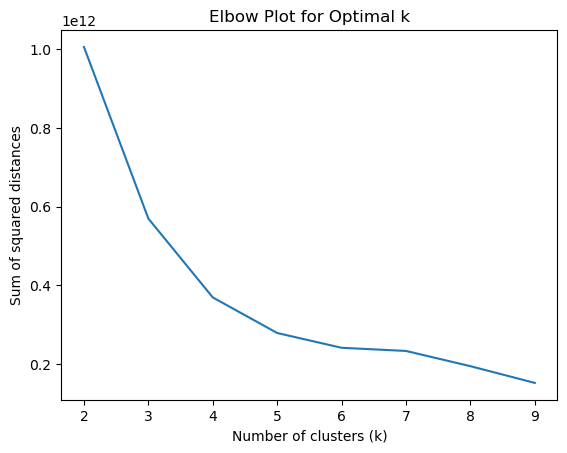

In [ ]:
# Initialize Spark session
spark = SparkSession.builder.appName('ElbowMethod').getOrCreate()

# Assuming df_user is already loaded and preprocessed
# Including multiple features
feature_columns = [
    'compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot',
    'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos',
    'compliment_plain', 'compliment_profile', 'compliment_writer', 'user_review_count',
    'user_useful', 'user_funny', 'user_cool'
]

vec_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_user_features = vec_assembler.transform(df_user)

# Determine the range of k values to test
k_range = range(2, 10)  # for example, testing k from 2 to 9

# Initialize list to store sum of squared distances for each k
sse = []

for k in k_range:
    kmeans = KMeans(featuresCol="features", k=k)
    model = kmeans.fit(df_user_features)

    # Compute sum of squared distances of points to their nearest center
    sse.append(model.summary.trainingCost)

# Plot the elbow plot
plt.plot(k_range, sse)
plt.xticks(k_range)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Plot for Optimal k')
plt.show()

It is clear from this plot that three is a turning point, beyond which the rate of inertia reduction slows significantly. Therefore, three clusters are the optimal choice for the user dataset.

### Compliment Profile Clustering

In [ ]:
# Initialize Spark session
spark = SparkSession.builder.appName('ComplimentProfileClustering').getOrCreate()

# Assuming df_user is already loaded
# Let's select the relevant columns for clustering
compliment_cols = ['compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot',
                   'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos',
                   'compliment_plain', 'compliment_profile', 'compliment_writer']

vec_assembler = VectorAssembler(inputCols=compliment_cols, outputCol="features")
df_user_features = vec_assembler.transform(df_user)

# Select only the first 100 rows for faster computation
df_user_features = df_user_features.limit(100)

# Perform KMeans clustering
kmeans = KMeans(featuresCol="features", k=3)  # Adjust the number of clusters (k) as needed
model = kmeans.fit(df_user_features)

# Make predictions
df_user_predictions = model.transform(df_user_features)

24/04/29 17:40:18 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [ ]:
# Calculate the average 'Cool' compliments for each cluster
cluster_avg_compliments = df_user_predictions.groupBy('prediction').agg(
    avg('compliment_cool').alias('avg_compliment_cool')
)

# Collect the data to the driver for plotting
cluster_avg_compliments = cluster_avg_compliments.toPandas()

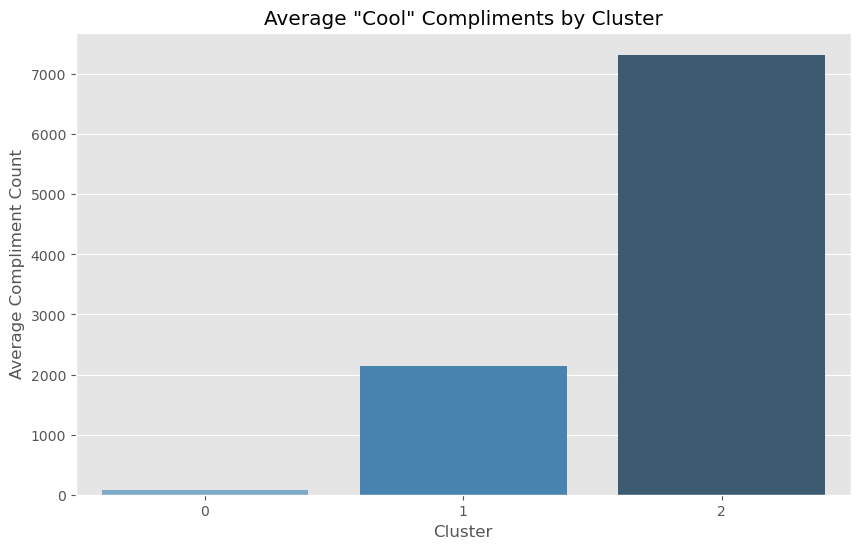

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='prediction', y='avg_compliment_cool', data=cluster_avg_compliments, palette="Blues_d")

plt.title('Average "Cool" Compliments by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Compliment Count')
plt.show()

This compliment profile clustering is dealing with grouping Yelp users based on the types and frequencies of compliments they have received from other users on the platform. We performed kmeans clustering here to perform this analysis.

As we can see from the visualizations, the first plot shows us that the Cluster 2 has the highest average "Cool" compliment count indicating us that other users find the users in this cluster as "Cool". Additionally, the Clusters 0 and 1 have lower "Cool" compliment counts which shows us that they are considered less "Cool" by other users.

From the visualizations, we can see that the clusters represent different user personalities which are reflected in the types of compliments they receive. For example, Cluster 2 users could be perceived as trendy, stylish, while Cluster 0 users may be perceived less engaged with the platform.

Moreover, compliment patterns could also be influenced by the types of interactions or content shared by users in each cluster. Users in Cluster 2 might be more active in sharing interesting or captivating content, leading to more "cool" and "cute" compliments from other users.

Lastly, understanding these user segments based on compliment profiles can be valuable for targeted marketing campaigns.

### Rating Behavior Clustering

In [ ]:
# Initialize Spark session
spark = SparkSession.builder.appName("YelpClustering").getOrCreate()

In [ ]:
# Data preparation, ensure average_stars is in the correct format
df_user = df_user.withColumn("average_stars", df_user["average_stars"].cast("float"))

In [ ]:
# Feature selection
vec_assembler = VectorAssembler(inputCols=["average_stars"], outputCol="features")
df_user_kmeans = vec_assembler.transform(df_user)

In [ ]:
# Determine the number of clusters
k = 3

# Model training
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_user_kmeans)

In [ ]:
# Make predictions
predictions = model.transform(df_user_kmeans)

In [ ]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[4.574429]
[1.36997963]
[3.27930079]


In [ ]:
# You may want to add the prediction to the dataframe and then analyze the clusters
df_with_predictions = predictions.select("user_id", "average_stars", "prediction")

In [ ]:
# Show the result with clusters
df_with_predictions.select('user_id', 'average_stars', 'prediction').show()

+--------------------+-------------+----------+
|             user_id|average_stars|prediction|
+--------------------+-------------+----------+
|qVc8ODYU5SZjKXVBg...|         3.91|         2|
|j14WgRoU_-2ZE1aw1...|         3.74|         2|
|2WnXYQFK0hXEoTxPt...|         3.32|         2|
|SZDeASXq7o05mMNLs...|         4.27|         0|
|hA5lMy-EnncsH4JoR...|         3.54|         2|
|q_QQ5kBBwlCcbL1s4...|         3.85|         2|
|cxuxXkcihfCbqt5By...|         2.75|         2|
|E9kcWJdJUHuTKfQur...|         3.73|         2|
|lO1iq-f75hnPNZkTy...|         4.04|         0|
|AUi8MPWJ0mLkMfwbu...|          3.4|         2|
|iYzhPPqnrjJkg1JHZ...|          4.0|         0|
|xoZvMJPDW6Q9pDAXI...|         3.89|         2|
|vVukUtqoLF5BvH_Vt...|         4.51|         0|
|_crIokUeTCHVK_JVO...|         3.08|         2|
|1McG5Rn_UDkmlkZOr...|         4.29|         0|
|SgiBkhXeqIKl1PlFp...|         3.75|         2|
|fJZO_skqpnhk1kvom...|         4.15|         0|
|x7YtLnBW2dUnrrpwa...|         3.84|    

In [ ]:
# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = df_with_predictions.toPandas()

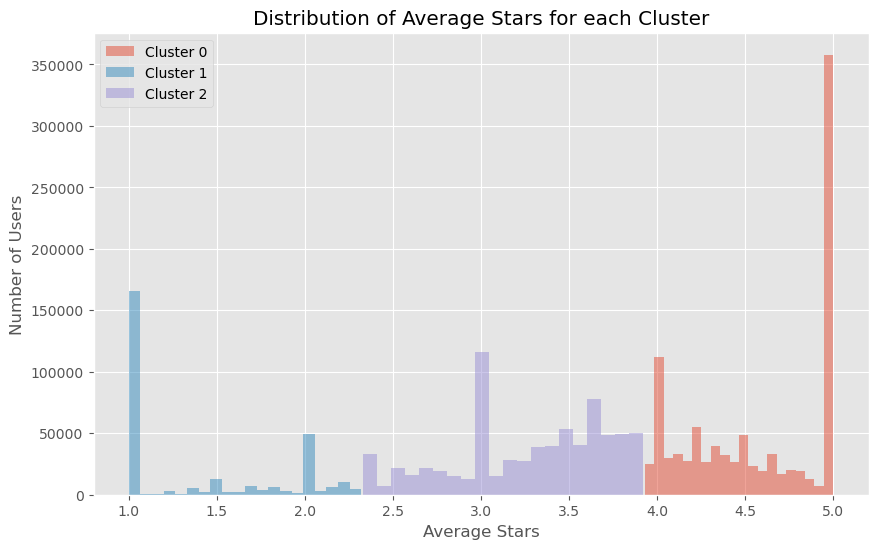

In [ ]:
# Histogram of the 'average_stars' distribution for each cluster
plt.figure(figsize=(10, 6))
for i in range(k):  # Loop over the number of clusters
    # Select only data observations with cluster label == i
    cluster = pandas_df.loc[pandas_df['prediction'] == i]
    # Plot the distribution of 'average_stars' for this cluster
    plt.hist(cluster['average_stars'], bins=20, alpha=0.5, label=f'Cluster {i}')

plt.title('Distribution of Average Stars for each Cluster')
plt.xlabel('Average Stars')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

Cluster 1 (blue) has a very tall bar at the 1.0 rating, suggesting a significant number of users in this cluster have an average rating of exactly 1.0. The presence of users with such a low average rating might indicate these are users who are very critical or have had consistently poor experiences.

Cluster 2 (purple) has its tallest bar around the 3.0 rating area. This indicates that most users in this cluster have average ratings around 3.0, which suggests they might have mixed or average experiences.

Cluster 0 (red) has a notable spike at the 5.0 rating, showing a large number of users with a perfect average rating. This cluster could consist of users who are highly satisfied or possibly less frequent reviewers who only leave reviews for exceptionally good experiences.

From a strategic business standpoint, understanding these clusters can inform several approaches:

- Marketing Strategy: Tailoring marketing communications to each cluster, recognizing that Cluster 0 might respond well to loyalty-building efforts, while Cluster 1 could be engaged for constructive feedback.
- Product Development: Using the reviews from Cluster 2 to inform product or service development since their moderate stance might align closely with a broad customer base.
- Brand Analysis: Identifying brand advocates in Cluster 0 for user-generated content campaigns, while also gauging brand health and perception in the more critical Cluster 1.

We have successfully segmented users into different types. Leveraging the features of each type, Yelp can recommend businesses that align most with their preferences, drawing from the types of businesses we clustered based on attributes. But business attributes are not fixed; businesses can always update them for improvement purposes. To navigate the direction of improvement, we conducted topic modeling and sentiment analysis on the review and tip datasets, aiming to uncover customers' suggestions for each individual business.

## 8. Topic Modeling and Sentiment Analysis with Spark-NLP & Spark MLlib on the REVIEW and TIP dataset


**Topic modeling** describes the broad task of assigning topics to unlabeled text documents, it is therefore considered as a clustering task. For our purpose, we implemented a popular technique for topic modeling called Latent Dirichlet Allocation (LDA). LDA is a generative probabalistic model that tries to find groups of words that appear frequently together across different documents.\
-- Reference: Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, Third Edition

**Spark MLlib** is a scalable machine learning library written in Apache Spark. By leveraging the efficiency of Spark with a suite of fine-tuned machine learning algorithms, MLlib can analyze large amounts of data. It has APIs in Java, Scala, Python and R. In our analysis, we'll specifically focus on Python. [Reference](https://codelabs.developers.google.com/codelabs/spark-nlp#0)

**Spark NLP** is a library created by John Snow Labs for performing efficient natural language processing tasks using Spark. Perhaps most significantly, Spark-NLP extends the capabilities of Spark MLlib by providing components that easily slot into MLlib Pipelines. [Reference](https://codelabs.developers.google.com/codelabs/spark-nlp#0)


In [ ]:
import sparknlp
from sparknlp.base import DocumentAssembler, Finisher
from sparknlp.annotator import Tokenizer, Normalizer, Stemmer, StopWordsCleaner
from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer, IDF, StopWordsRemover
from pyspark.ml.clustering import LDA
from pyspark.sql.functions import regexp_replace
from itertools import chain
from wordcloud import WordCloud, ImageColorGenerator
from sparknlp.annotator import SentimentDLModel, UniversalSentenceEncoder
from pyspark.sql.types import StringType
from pyspark.sql.functions import col, explode

### Analysis on the REVIEW dataset

We first clean the text by removing special characters using regular expression.

In [ ]:
# remove special characters
df_review = df_review.withColumn('text_clean', regexp_replace(df_review['text'], '\n', ''))
df_review = df_review.withColumn('text_clean', regexp_replace(df_review['text_clean'], '[^\w\s?!]', ''))

After cleaning, we filter the review data, making it only contains business ids of Starbucks.



In [ ]:
spark.stop()

spark = SparkSession.builder \
    .appName("Spark NLP") \
    .master("local[*]") \
    .config("spark.driver.memory", "16G") \
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .config("spark.kryoserializer.buffer.max", "2000M") \
    .config("spark.driver.maxResultSize", "0") \
    .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:5.3.3") \
    .getOrCreate()

# Show all columns & rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

24/04/28 16:46:04 INFO SparkEnv: Registering MapOutputTracker
24/04/28 16:46:04 INFO SparkEnv: Registering BlockManagerMaster
24/04/28 16:46:04 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
24/04/28 16:46:04 INFO SparkEnv: Registering OutputCommitCoordinator


In [ ]:
df_review.count()

6990280

There are 7 million reviews in total.

#### Topic modeling - Starbucks Example

In this section, we use Starbucks as an example to demonstrate how to generate insights for businesses by topic modeling, using the review and tip dataset.

We filter the review data, making it only contains business ids of Starbucks.

In [ ]:
df_review.createOrReplaceTempView('df_review')
df_business.createOrReplaceTempView('df_business')

df_review_starbucks = spark.sql("""
select
*
from df_review
where business_id in (
    select
    business_id
    from df_business
    where name = 'Starbucks'
)
""")

df_review_starbucks.createOrReplaceTempView('df_review_starbucks')
df_review_starbucks.show(10)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|          text_clean|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+
|aJvxWyQIG5OLfBw3q...|   0|2017-12-29 19:38:31|    0|ULzbgT5SPThiMOoo4...|  2.0|Ordered Caramel f...|     0|veBX5roHQLNnQ1rTt...|Ordered Caramel f...|
|MjZQqZAmJeMco_Vq-...|   0|2014-02-05 19:38:24|    0|RXqhxbAuPPSNs-oyJ...|  4.0|Drum-roll please!...|     0|zZygOZLNyJX5nDqKr...|Drumroll please! ...|
|u7MJKcNdZXYyTeb67...|   0|2017-02-09 04:35:39|    0|LuMkMBAUV1B-2dm2p...|  4.0|We stopped here f...|     1|0SpK7eVn5TrpyQKPa...|We stopped here f...|
|saJFbz12EnzanelpD...|   0|2016-08-25 14:08:18|    0|Z0Jt8xf0XqFD_xjPP...|  2.0|There's been t

After that, we streamline the transformers (document_assembler, tokenizer, stemmer, finisher, vectorizer, and idf) and the LDA model using pipeline, and train with Starbucks review data.
- document_assembler: takes raw inputs of text and transforms them into document-type annotations that other SparkNLP components can operate on
- tokenizer: converts documents into tokens
- stemmer: reduces tokens into their base/root form
- finisher: convert the output from SparkNLP components into format that Spark MLlib components can process
- stopword_remover: remove english stopwords
- vectorizer: create bag of words as model input
- idf: calculate inverse document frequency
- lda: model

In [ ]:
# code is modified based on: https://codelabs.developers.google.com/codelabs/spark-nlp#7

# Setup Pipeline components
document_assembler = DocumentAssembler().setInputCol("text_clean").setOutputCol("document").setCleanupMode("shrink")

tokenizer = Tokenizer().setInputCols(["document"]).setOutputCol("token")

normalizer = Normalizer().setInputCols(["token"]).setOutputCol("normalized").setLowercase(True)

stemmer = Stemmer().setInputCols(["normalized"]).setOutputCol("stem")

finisher = Finisher().setInputCols(["stem"]).setOutputCols(["to_spark"]).setOutputAsArray(True)

stopword_remover = StopWordsRemover().setInputCols(["to_spark"]).setOutputCols(["filtered"])

vectorizer = CountVectorizer(inputCol="filtered", outputCol="raw_features")

idf = IDF(inputCol="raw_features", outputCol="features")

lda = LDA(k=10, maxIter=10, featuresCol="features")

pipeline = Pipeline(stages=[
    document_assembler,
    tokenizer,
    normalizer,
    stemmer,
    finisher,
    stopword_remover,
    vectorizer,
    idf,
    lda
])

# Apply the Pipeline
model = pipeline.fit(df_review_starbucks)
transformed = model.transform(df_review_starbucks)

In [ ]:
# code with the help of ChatGPT
topics = model.stages[-1].describeTopics(maxTermsPerTopic=5)
cv_model = model.stages[6]

# Retrieve the vocabulary from the model
vocab = cv_model.vocabulary

# Function to convert index to words using the vocabulary
def index_to_word(topic_df):
    # Maps each topic's indices to actual words using the vocabulary
    return topic_df.rdd.map(lambda row: (row['topic'], [vocab[idx] for idx in row['termIndices']], row['termWeights'])).toDF(["topic", "terms", "termWeights"])

# Apply the function to convert indices to words
df_topics_with_words = index_to_word(topics)
df_topics_with_words.show(truncate=False)

+-----+-----------------------------------------+------------------------------------------------------------------------------------------------------------------+
|topic|terms                                    |termWeights                                                                                                       |
+-----+-----------------------------------------+------------------------------------------------------------------------------------------------------------------+
|0    |[wa, order, tea, thei, go]               |[0.00466193807148459, 0.004502317186385694, 0.004116589891705834, 0.0030826504362528526, 0.0029901043471332145]   |
|1    |[wa, thei, alwai, ar, locat]             |[0.0056669902704494955, 0.005466952661987005, 0.005206030241618732, 0.005124968588510668, 0.004953240430129277]   |
|2    |[sweg, emma, balanc, terri, wa]          |[0.001412388873860496, 0.0013532083471771519, 0.0013446343139779948, 0.0011990376085712418, 0.0011780834993644425]|
|3    |[lo

LDA generates terms with top 5 highest term weights for each document. Now we can create a wordcloud visualization.

In [ ]:
!pip install wordcloud

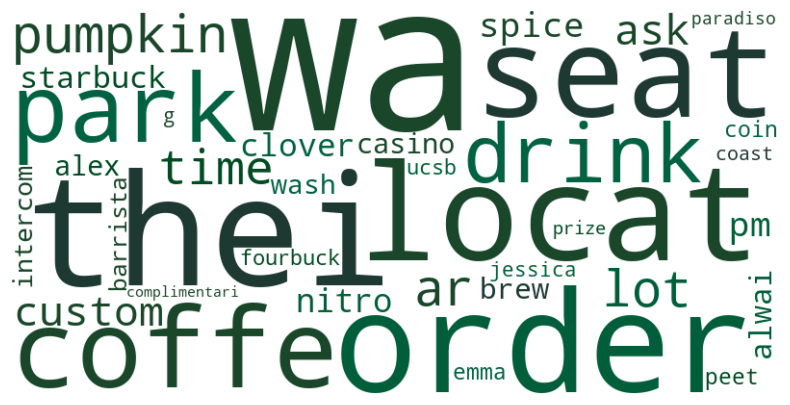

In [ ]:
# code with the help of ChatGPT
pdf_topics_with_words = df_topics_with_words.toPandas()

word_freq = {}
for index, row in pdf_topics_with_words.iterrows():
    words = row['terms']
    weights = row['termWeights']
    for word, weight in zip(words, weights):
        if word in word_freq:
            word_freq[word] += weight
        else:
            word_freq[word] = weight


def starbucks_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#006241', '#1e3932', '#004b23', '#1a472a', '#005e3a']
    return colors[random_state.randint(0, len(colors)-1)]

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=starbucks_color_func, random_state=3).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Using the wordcloud, we can help businesses to identify what products or services are frequently commemted. For instance, we would suggest Starbucks to pay more attention to reviews on products such as 'pumpkin spice' and 'nitro brew' as well as services such as 'peet', 'park', and 'seat'.

### Analysis on the TIP dataset

Now, we apply topic modeling to the tip data to help business like Starbucks to identify aspects of their services that needed to be improved.

In [ ]:
# remove special characters
df_tip = df_tip.withColumn('text_clean', regexp_replace(df_tip['text'], '\n', ''))
df_tip = df_tip.withColumn('text_clean', regexp_replace(df_tip['text_clean'], '[^\w\s?!]', ''))

In [ ]:
df_tip.createOrReplaceTempView('df_tip')
df_business.createOrReplaceTempView('df_business')

df_tip_starbucks = spark.sql("""
select
*
from df_tip
where business_id in (
    select
    business_id
    from df_business
    where name = 'Starbucks'
)
""")

df_tip_starbucks.createOrReplaceTempView('df_tip_starbucks')
df_tip_starbucks.show(10)

+--------------------+----------------+-------------------+--------------------+--------------------+--------------------+
|         business_id|compliment_count|               date|                text|             user_id|          text_clean|
+--------------------+----------------+-------------------+--------------------+--------------------+--------------------+
|iFunuVzrg10UesZvM...|               0|2016-12-09 23:52:17|Great customer se...|_sxfMOKphtb9S_4tq...|Great customer se...|
|wWoX5l58K8YTokEWR...|               0|2013-08-24 00:34:35|Never have a bad ...|ALNUwFXAHXmFeQ9V2...|Never have a bad ...|
|zXvjFr3lftIlkuFNl...|               0|2013-05-19 21:49:44|Sundays in the su...|IFhqsrhESIC66b3IC...|Sundays in the su...|
|Flu8zFsJbX-mRw2yO...|               0|2011-12-26 19:52:54|Small place.  The...|Y-HpR79F_ZqRtGMjZ...|Small place  They...|
|mNO9pUXwxP2VgOhXI...|               0|2012-07-28 20:30:03|Wear your winter ...|PWdye8-VRbkTtKP8o...|Wear your winter ...|
|2sGHOKjHl5S0iqR

In [ ]:
# Apply the Pipeline
model_tip = pipeline.fit(df_tip_starbucks)
transformed = model_tip.transform(df_tip_starbucks)

In [ ]:
# code with the help of ChatGPT
topics = model_tip.stages[-1].describeTopics(maxTermsPerTopic=5)
cv_model = model_tip.stages[6]

# Retrieve the vocabulary from the model
vocab = cv_model.vocabulary

# Function to convert index to words using the vocabulary
def index_to_word(topic_df):
    # Maps each topic's indices to actual words using the vocabulary
    return topic_df.rdd.map(lambda row: (row['topic'], [vocab[idx] for idx in row['termIndices']], row['termWeights'])).toDF(["topic", "terms", "termWeights"])

# Apply the function to convert indices to words
df_topics_with_words = index_to_word(topics)
df_topics_with_words.show(truncate=False)

+-----+-------------------------------------+--------------------------------------------------------------------------------------------------------------+
|topic|terms                                |termWeights                                                                                                   |
+-----+-------------------------------------+--------------------------------------------------------------------------------------------------------------+
|0    |[thei, drink, grand, got, better]    |[0.009306542802348343, 0.007995203223349092, 0.007754182734491167, 0.0076075584398437, 0.007208428655804603]  |
|1    |[tea, green, ic, front, check]       |[0.025140672714943933, 0.01554511737502609, 0.0106250949184845, 0.006712227303110928, 0.006473442996444331]   |
|2    |[come, line, dont, go, long]         |[0.010281933036728917, 0.010215833952510703, 0.009580388276239717, 0.009462997273008302, 0.008083141339442306]|
|3    |[caramel, wifi, cant, start, someth] |[0.0114345536

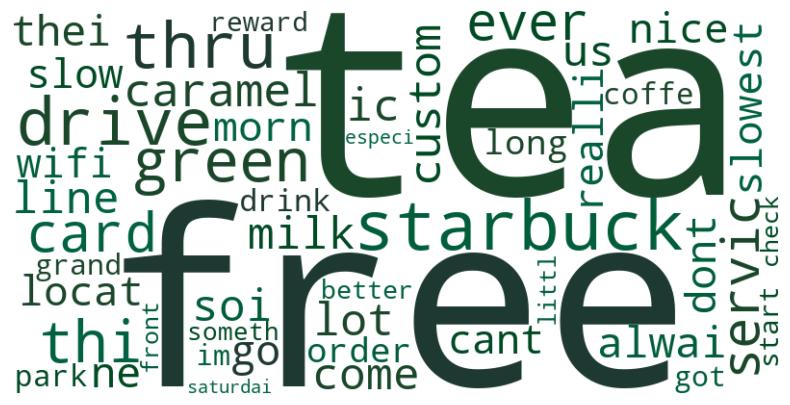

In [ ]:
# code with the help of ChatGPT
pdf_topics_with_words = df_topics_with_words.toPandas()

word_freq = {}
for index, row in pdf_topics_with_words.iterrows():
    words = row['terms']
    weights = row['termWeights']
    for word, weight in zip(words, weights):
        if word in word_freq:
            word_freq[word] += weight
        else:
            word_freq[word] = weight


def starbucks_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#006241', '#1e3932', '#004b23', '#1a472a', '#005e3a']
    return colors[random_state.randint(0, len(colors)-1)]

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=starbucks_color_func, random_state=3).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the worldcould, we can identify aspects of services such as 'park', 'slow', 'wifi', 'tea', 'free', etc. Based on these tips, we can help Starbucks to develop business strategies such as improving app ordering services or hiring more employees to faster the orders; providing better wifi services and launching marketing activities such as 'buy one get one free' to keep and attract customers.

### Sentiment Analysis

Precise sentiment analysis plays a crucial part in helping business refining their services. However, it is quite a challenge to train a well functional deep learning model from strach since we have 7 million reviews and limited computational power as well as hardware. Therefore, using a pre-trained model is a commercial and feasible resoluation.

The pre-trained model we used was 'sentimentdl_use_imdb' from Spark NLP that is trained on classifying IMDB reviews in negative, positive, and neutral categories using `Universal Sentence Encoder`. Reason for choosing this model is because the length and tone of IBDM reviews are very similar to Yelp reviews.

In [ ]:
# code is modified based on: https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/streamlit_notebooks/SENTIMENT_EN.ipynb
documentAssembler = DocumentAssembler()\
    .setInputCol("text_clean")\
    .setOutputCol("document")

use = UniversalSentenceEncoder.pretrained(name="tfhub_use", lang="en")\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")


sentimentdl = SentimentDLModel.pretrained(name='sentimentdl_use_imdb', lang="en")\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("sentiment")

nlpPipeline = Pipeline(
    stages = [
        documentAssembler,
        use,
        sentimentdl
        ])

result = nlpPipeline.fit(df_review).transform(df_review)

result.select(F.explode(F.arrays_zip(result.document.result,
                                     result.sentiment.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("document"),
              F.expr("cols['1']").alias("sentiment")).limit(10).toPandas()

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentimentdl_use_imdb download started this may take some time.
Approximate size to download 12 MB
[OK!]


,document,sentiment
0,If you decide to eat here just be aware it is going to take about 2 hours from beginning to end We have tried it multiple times because I want to like it! I have been to its other locations in NJ and never had a bad experience The food is good but it takes a very long time to come out The waitstaff is very young but usually pleasant We have just had too many experiences where we spent way too long waiting We usually opt for another diner or restaurant on the weekends in order to be done quicker,pos
1,Ive taken a lot of spin classes over the years and nothing compares to the classes at Body Cycle From the nice clean space and amazing bikes to the welcoming and motivating instructors every class is a top notch work outFor anyone who struggles to fit workouts in the online scheduling system makes it easy to plan ahead and theres no need to line up way in advanced like many gyms make you doThere is no way I can write this review without giving Russell the owner of Body Cycle a shout out Russells passion for fitness and cycling is so evident as is his desire for all of his clients to succeed He is always dropping in to classes to check inprovide encouragement and is open to ideas and recommendations from anyone Russell always wears a smile on his face even when hes kicking your butt in class!,pos
2,Family diner Had the buffet Eclectic assortment a large chicken leg fried jalapeo tamale two rolled grape leaves fresh melon All good Lots of Mexican choices there Also has a menu with breakfast served all day long Friendly attentive staff Good place for a casual relaxed meal with no expectations Next to the Clarion Hotel,pos
3,Wow! Yummy different delicious Our favorite is the lamb curry and korma With 10 different kinds of naan!!! Dont let the outside deter you because we almost changed our mindsgo in and try something new! Youll be glad you did!,pos
4,Cute interior and owner ? gave us tour of upcoming patiorooftop area which will be great on beautiful days like today Cheese curds were very good and very filling Really like that sandwiches come w salad esp after eating too many curds! Had the onion gruyere tomato sandwich Wasnt too much cheese which I liked Needed something elsepepper jelly maybe Would like to see more menu options added such as salads w fun cheeses Lots of beer and wine as well as limited cocktails Next time I will try one of the draft wines,pos
5,I am a long term frequent customer of this establishment I just went in to order take out 3 apps and was told theyre too busy to do it Really? The place is maybe half full at best Does your dick reach your ass? Yes? Go fuck yourself! Im a frequent customer AND great tipper Glad that Kanella just opened NEVER going back to dmitris!,neg
6,Loved this tour! I grabbed a groupon and the price was great It was the perfect way to explore New Orleans for someone whod never been there before and didnt know a lot about the history of the city Our tour guide had tons of interesting tidbits about the city and I really enjoyed the experience Highly recommended tour I actually thought we were just going to tour through the cemetery but she took us around the French Quarter for the first hour and the cemetery for the second half of the tour Youll meet up in front of a grocery store seems strange at first but its not terribly hard to find and itll give you a chance to get some water and youll stop at a visitor center part way through the tour for a bathroom break if needed This tour was one of my favorite parts of my trip!,pos
7,Amazingly amazing wings and homemade bleu cheese Had the ribeye tender perfectly prepared delicious Nice selection of craft beers Would DEFINITELY recommend checking out this hidden gem,pos
8,This easter instead of going to Lopez Lake we went to Los Padres National Forest which is really pretty but if you go to white rock the staff needs to cut down all the dead grass that invades the rock and the water I would wish the staff would also clean or

In [ ]:
result.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- text_clean: string (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |    |    |-- embeddings: array (nullable = true)
 |    |    |    |-- element: float (containsNull = false)
 |-- sentence_embeddings: array (nullable = true)
 |    |-- element: struct (cont

#### Export Result

To faciliate analysis after applying the pre-trained model, we choose to export the review data with sentiment label in parquet format.

In [ ]:
# sentiment_df = result.withColumn("sentiment_result", explode(col("sentiment.result")))
# sentiment_df = sentiment_df.drop('sentiment', 'document', 'sentence_embeddings')
# sentiment_df.write.mode("append").parquet(path+'yelp_academic_dataset_review_with_sentiment.parquet')

#### Analysis

Having labelled review data ready, we can now utilize the sentiment to perform further analysis.

In [ ]:
df_review_sentiment = spark.read.parquet(path+'yelp_academic_dataset_review_with_sentiment.parquet')
df_review_sentiment.limit(2).toPandas()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text_clean,sentiment_result
0,XQfwVwDr-v0ZS3_CbbE5Xw,0,2018-07-07 22:09:11,0,KU_O5udG6zpxOg-VcAEodg,3.0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",0,mh_-eMZ6K5RLWhZyISBhwA,If you decide to eat here just be aware it is going to take about 2 hours from beginning to end We have tried it multiple times because I want to like it! I have been to its other locations in NJ and never had a bad experience The food is good but it takes a very long time to come out The waitstaff is very young but usually pleasant We have just had too many experiences where we spent way too long waiting We usually opt for another diner or restaurant on the weekends in order to be done quicker,pos
1,7ATYjTIgM3jUlt4UM3IypQ,1,2012-01-03 15:28:18,0,BiTunyQ73aT9WBnpR9DZGw,5.0,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!",1,OyoGAe7OKpv6SyGZT5g77Q,Ive taken a lot of spin classes over the years and nothing compares to the classes at Body Cycle From the nice clean space and amazing bikes to the welcoming and motivating instructors every class is a top notch work outFor anyone who struggles to fit workouts in the online scheduling system makes it easy to plan ahead and theres no need to line up way in advanced like many gyms make you doThere is no way I can write this review without giving Russell the owner of Body Cycle a shout out Russells passion for fitness and cycling is so evident as is his desire for all of his clients to succeed He is always dropping in to classes to check inprovide encouragement and is open to ideas and recommendations from anyone Russell always wears a smile on his face even when hes kicking your butt in class!,pos


In [ ]:
df_review_sentiment.count()

6990125

First, we want to see the how many reviews fall into each category of the sentiment.

In [ ]:
df_review_sentiment.createOrReplaceTempView('df_review_sentiment')

df_result = spark.sql("""
select
sentiment_result,
count(sentiment_result)
from df_review_sentiment
group by sentiment_result
""").toPandas()
df_result

,sentiment_result,count(sentiment_result)
0,pos,5301275
1,neg,1649715
2,neutral,39135


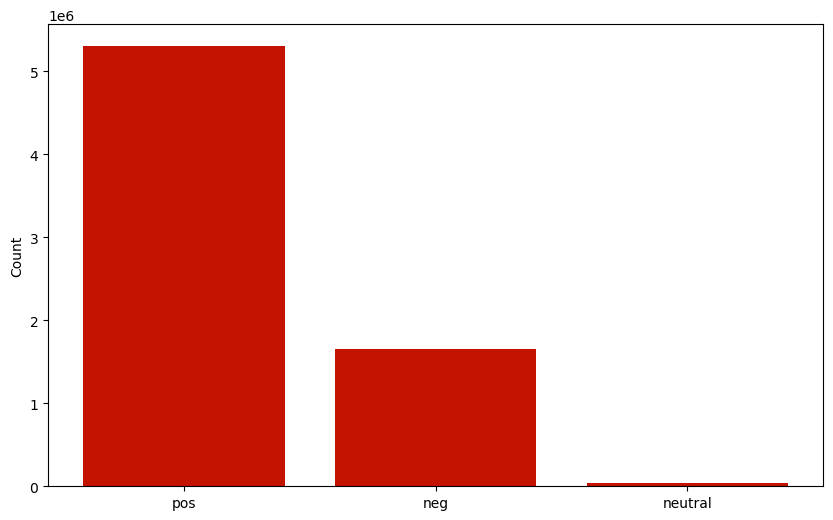

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_result['sentiment_result'], df_result['count(sentiment_result)'], color='#c41200')
plt.ylabel('Count')
plt.show()

- Predominant reviews are positive.
- Negative reviews are about 1/3 of positive reviews.
- Neutral reviews are very uncommon.

Now, we want to investigate into the relationship between stars and sentiment.

In [ ]:
df_pos=spark.sql("""
select
stars,
count(stars)
from df_review_sentiment
where sentiment_result = 'pos'
group by stars
order by stars
""").toPandas()
df_pos

,stars,count(stars)
0,1.0,180668
1,2.0,191785
2,3.0,460199
3,4.0,1340952
4,5.0,3127671


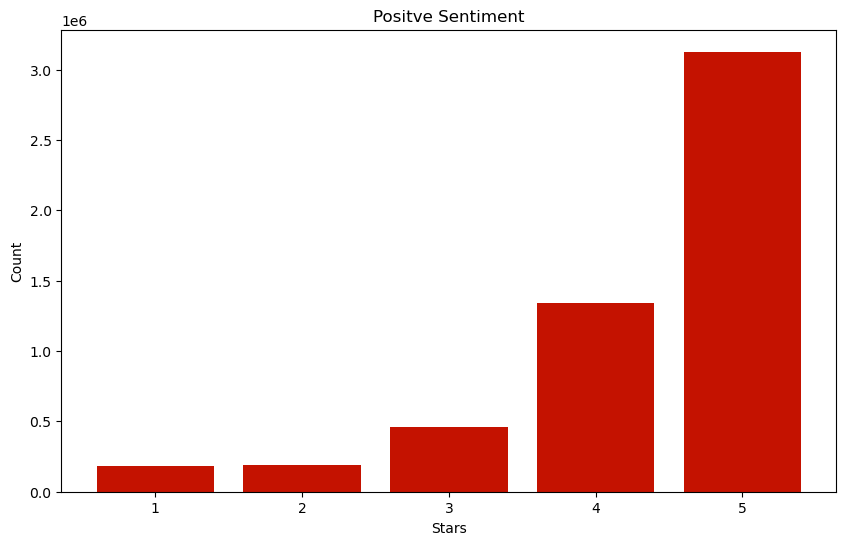

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_pos['stars'], df_pos['count(stars)'], color='#c41200')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Positve Sentiment')
plt.show()

Like what we have expected, customers that gives positive reviews are very likely to give high stars(4 or 5). However, lower stars can still be given to the business since sentiment only represents a general emotional tendency. For instance, let's take a look at the following review:

'If you decide to eat here just be aware it is going to take about 2 hours from beginning to end We have tried it multiple times because I want to like it! I have been to its other locations in NJ and never had a bad experience The food is good but it takes a very long time to come out The waitstaff is very young but usually pleasant We have just had too many experiences where we spent way too long waiting We usually opt for another diner or restaurant on the weekends in order to be done quicker'.

The customer gave 3 stars and wrote a positive review. Obviously, there is disatisfication (the customer complaining about long waiting time) in the review, and positive sentiment is assigned by the model since compliments (food is delicious) outweights disatisfication. Therefore, although positive reviews often corresponds to high stars, positive reviews with low stars are where valuable insights for service improvement can be generated.


In [ ]:
df_neg=spark.sql("""
select
stars,
count(stars)
from df_review_sentiment
where sentiment_result = 'neg'
group by stars
order by stars
""").toPandas()
df_neg

,stars,count(stars)
0,1.0,878356
1,2.0,344593
2,3.0,222819
3,4.0,105674
4,5.0,98273


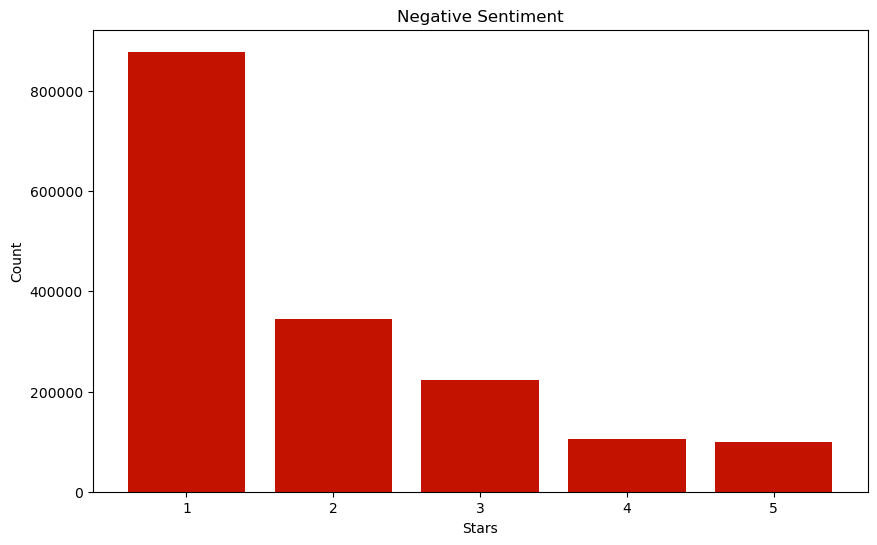

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_neg['stars'], df_neg['count(stars)'], color='#c41200')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Negative Sentiment')
plt.show()

Likewise, negative sentiment, in general, corresponds to low stars.

In [ ]:
df_neutral=spark.sql("""
select
stars,
count(stars)
from df_review_sentiment
where sentiment_result = 'neutral'
group by stars
order by stars
""").toPandas()

df_neutral

,stars,count(stars)
0,1.0,10516
1,2.0,7854
2,3.0,8892
3,4.0,6245
4,5.0,5628


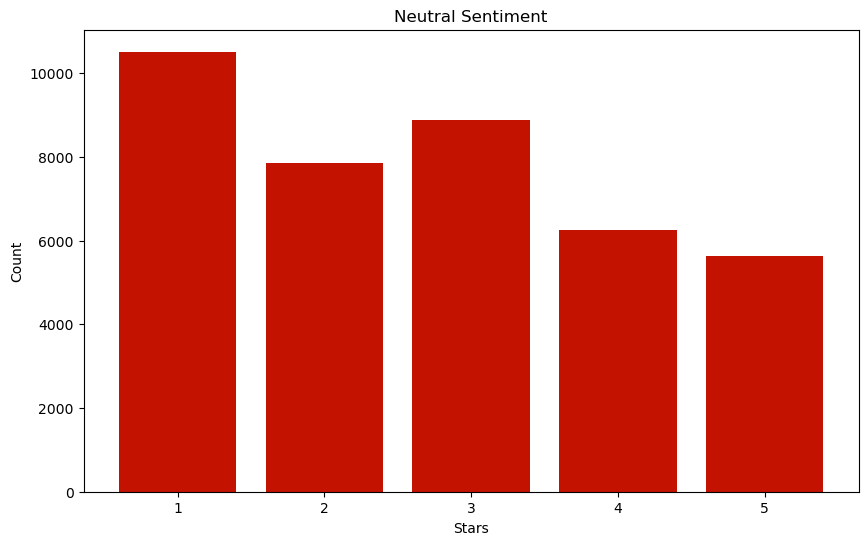

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_neutral['stars'], df_neutral['count(stars)'], color='#c41200')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Neutral Sentiment')
plt.show()

The stars given are more evenly distributed for neutral reviews.

From the stars distribution based on sentiment categories, we can verify that the pre-trained model gives very accurate sentiment labels. However, the model has a 0.85 accuracy, which means it can make mistakes as well.

## 9. Conclusion
The Yelp dataset we utilized comprises diverse data. Through simple analysis, we gained insights into the geographical distribution of businesses, customer satisfaction levels, and the most popular business categories. This information aids us in conducting further in-depth analysis. Employing clustering, we categorized all businesses based on their attributes. When a user leaves a positive review for a business, we can identify other businesses in the same category and provide recommendations to the user. To streamline recommendations, we believe it's necessary to classify users as well. Analyzing the behavior patterns of user groups is much more cost-effective than analyzing each individual user, especially considering Yelp's extensive user base. With this, Yelp's system can accurately provide recommendations to users, while businesses can be recommended to the most suitable audience, resulting in a win-win situation. However, there are still areas for improvement from the businesses' perspective. We aim to extract insights from reviews and tips received by each business using LDA, focusing on the aspects that users are most concerned about. This is crucial for businesses to not only attract but also retain customers. Selecting the right reviews and tips is vital for achieving these goals. Through sentiment analysis, we discovered that positive comments with low ratings often contain the most valuable information. Therefore, using LDA to analyze this type of feedback is the most ideal approach.



## 10. Challenges
* **Long run time**: Our dataset is quite big. The two largest datasets among all five are approximately 5GB and 3GB, respectively. Processing them individually consumed a significant amount of time, and at times, the kernel would unexpectedly terminate before completing the task. Moreover, integrating everyone's contributions into a single notebook necessitated rerunning everything, resulting in considerable inconvenience. As a result, we took all the data for machine learning algorithms but sampled it for some visualizations to enhance efficiency.
* **Spark MLlib does not support higher level NLP features**: Spark MLlib has only basic NLP features such as Tokenizer and CountVectorizer, which are insufficient for our needs to perform NLP tasks on a higher level.
* **Third party NLP libraries**: While attempting to use the TextBlob library to calculate the polarity and subjectivity scores for each review on the cluster with two nodes, we encountered an error indicating that the library was unavailable on every node.
* **Spark NLP Configuration**: To use Spark NLP, we had to read documentations to create a new cluster with Spark NLP configuration.
* **Perform analysis after applying models**: Analysis became difficult to proceed with after applying the pre-trained model, even after caching the dataframe. To continue, we had to spend 10 hours exporting the review dataset in Parquet format.
* **Streamline Spark NLP and Spark MLlib transformers**: The LDA model was constructed using transformers from both Spark NLP and Spark MLlib. Therefore, additional research was being conducted on how to streamline these transformers.

## 11. References

1. For better manipulation of our huge amount of data, we referenced the PySpark code in this GitHub repository: https://github.com/soltaniehha/Big-Data-Analytics-for-Business.git
2. We referenced the following website to complete our sentiment analysis: https://sparknlp.org/2021/01/15/sentimentdl_use_imdb_en.html
3. Since the NLP library of spark is a new tool for us, we checked this website to understand how to install it and how to use its functions on Dataproc: https://codelabs.developers.google.com/codelabs/spark-nlp#7

## 12. Generative AI Disclosure
We primarily used ChatGPT to enhance the grammar and vocabulary choices in our text explanations. For code modifications, we primarily collaborated with each other and consulted our course materials. When incorporating ChatGPT into the coding process, we made annotations to indicate its usage.